# Fourier Transform Issues

Keep having trouble matching input.  If we go to single region I can see it is equivalent to Fourier transform,
but that still has the issue.  Here I work just the fourier transform.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib widget
plt.style.use('dark_background')

Input function

In [2]:
xs = -np.linspace(-5, 5, 1000)

def f(x):
    return x * np.exp(-x**2)
    

Plot

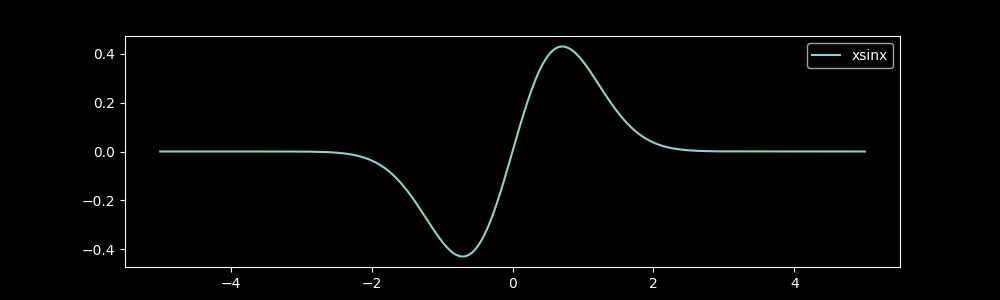

In [3]:
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xs, f(xs), label='xsinx');
plt.legend();

## Define transform

Need $$F(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty} f(x) e^{i\omega x} dx$$

In [28]:
def Fsci(w, f=f):
    return 1/(2*np.pi)*quad(lambda x: f(x)*np.exp(1j*w*x), -np.inf, np.inf, complex_func=True)[0]


def F(w, f=f, Lx=-3, Rx=3, N=17):
    xs = np.linspace(Lx, Rx, N)
    dx = xs[1] - xs[0]
    return 1/(2*np.pi)*sum([f(x)*np.exp(1j*w*x)*dx for x in xs])
    

F = np.vectorize(F)
Fsci = np.vectorize(Fsci)

In [29]:
ws = np.linspace(-5,5, 1000)
Fws = F(ws, N=11)
Fscis = Fsci(ws)

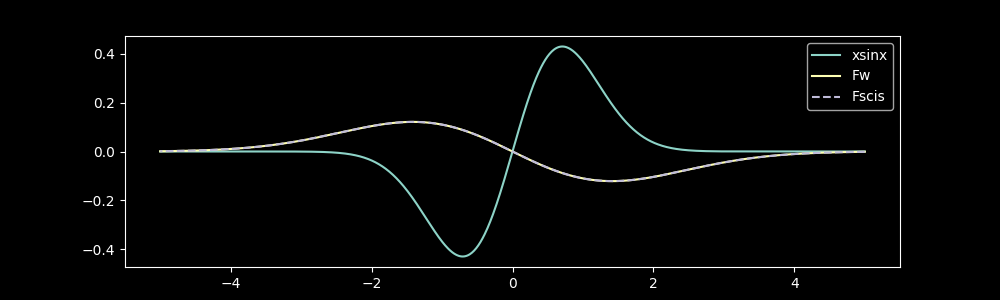

In [30]:
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xs, f(xs), label='xsinx')
ax.plot(xs, Fws.imag, label='Fw')
ax.plot(xs, Fscis.imag, '--', label='Fscis')
plt.legend();


In [31]:
def f2(x, F=F, Lw=-5, Rw=5, N=13):
    ws = np.linspace(Lw, Rw, N)
    dw = ws[1] - ws[0]
    return sum([F(w)*np.exp(-1j*w*x)*dw for w in ws])
    
f2 = np.vectorize(f2)

In [32]:
f2s = f2(xs)

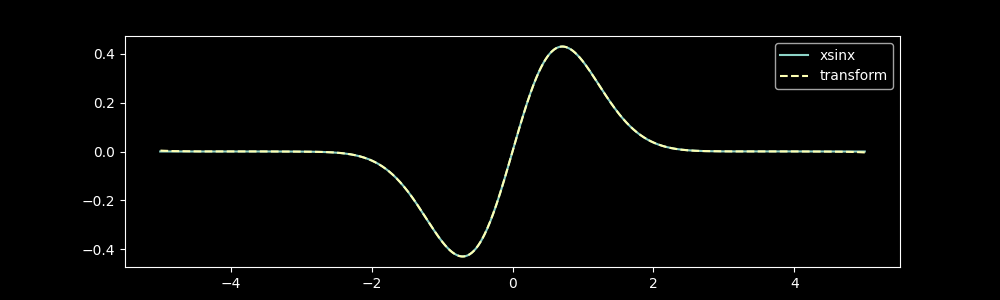

In [33]:
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xs, f(xs), label='xsinx');
ax.plot(xs, f2s.real, '--', label='transform');
plt.legend();


Okay, so that's the basic Fourier transform code, and it's working well

## Radiation Mode version

We have now our general solution for a transverse electric radiation mode on a region:
$$
\begin{align}
 E_y(x, z, t) & = \big[ A e^{iZx} + \bar{A} e^{-iZx} \big] e^{i(\beta z - \omega t)}\\
  \end{align}
$$
where $\beta = \sqrt{k_{\tiny\mbox{low}}^2 - Z^2}$.  The associated $H_x$ and $H_z$ components can be found from this component.  
We are interested (because these lead to bounded non-decaying solutions in the lateral direction) in the case of real positive $Z$, corresponding to real values of $\beta$ between $\pm k_{\tiny\mbox{low}}$ and pure imaginary beta with positive real part.

The need for the two coefficients being conjugate comes from the need for standing waves at the input face with no temporal phase shift, but it is also exactly what we need to do the typical moves for the Fourier Transform.  Note that if $A = a + bi$ we can transform the above into expressions using sines and cosines via:

$$  \cos(Zx) = \frac{e^{iZx} + e^{-iZx}}{2}$$

and

$$  \sin(Zx) = \frac{e^{iZx} - e^{-iZx}}{2i} $$

into the form:

$$
\begin{align}
 E_y(x, z, t) & = \big[ \hat{a} \cos(Zx) + \hat{b} \sin(Zx) \big] e^{i(\beta z - \omega t)}\\
  \end{align}
$$

where $\hat{a}= a/2$,  $\hat{b} = -b/2,$
so that we do have two independent real coefficients to build these fields.


##  Moving to Fourier style integral

We wish to describe the radiated portion of our field as an integral over the positive Z axis:

$$ E_r(x, z, t) = \int_0^\infty \big[ A(Z) e^{iZx} + \bar{A}(Z) e^{-iZx} \big] e^{i(\beta(Z) z - \omega t)} \;dZ $$

In a way this is a bit confusing, because when we have more regions we will need to specifically alter the coefficients in other regions to make the fields meet the interface conditions, so later our $A(Z)$ won't be totally free.   However, we'll deal with that later.

The process in Fourier transforms is to transition to an integral over the entire $Z$ axis of this form:

$$ E_r(x, z, t) = \int_{-\infty}^\infty \big[ C(Z)\, e^{-iZx} \big] e^{i(\beta(Z) z - \omega t)} \;dZ $$

via defining $C(Z) = \bar{}(Z)$ for non-negative $Z$ and $C(Z) = A(Z)$ for negative $Z$.  

We then need to match the input field $F_y(x,t) = f(x) e^{-i\omega t}$ at $z=0$ for all $x,t$.  After setting $z$ to zero and cancelling the common factor of $e^{-i\omega t}$ we require:


$$ f(x) = \int_{-\infty}^\infty C(Z)\, e^{-iZx} \;dZ. $$

This is now precisely the setting of the Fourier Transform.  We could then use:

$$ C(Z) = \frac{1}{2\pi} \int_{-\infty}^\infty f(x)\, e^{iZx} \;dx. $$

This is what we did above, but I want to better understand how this relates to the fields themselves...

Maxwell Reciprocity is the typical way we get to $C(Z)$.  This is done via

$$  \frac{1}{2} \int_{-\infty}^\infty E(x, Z) \times \bar{H} (x, \hat{Z}) \cdot \hat{z} \;dx = N(Z)\delta(Z - \hat{Z}).$$

where $E$ and $H$ the full vectorial electric and magnetic fields of two radiation modes.  The expression above on the left is the integral of the z component of the Poynting vector over the transverse domain, which gives the power carried in the direction of propagation.  The fctor $N(Z)$ is a normalization factor that apparently can be chosen by the user, but I don't really get this yet.  If we assume the input field has no component in the x direction, we can find $C(Z)$ by using this expression in the integral expansion of the fields, yielding:

$$ C(Z)N(Z) = \frac{\beta}{2k_0} \int_{x = -\infty}^\infty f(x)\, \bar{E}_y(x,Z) \;dx. $$

where

$$E_y(x,Z) = A(Z) e^{iZx} + \bar{A}(Z) e^{-iZx}$$

giving 

$$ C(Z) = \frac{\beta}{2k_0 N} \int_{x = -\infty}^\infty f(x)\, \big[ \bar{A}(Z) e^{-iZx} + A(Z) e^{iZx} \big]\;dx. $$


This is the analagous version of the Fourier transform for our structure: $C(Z)$ is akin to $F[f](Z)$.  But the latter has the form

$$F[f](Z) = \frac{1}{2\pi}  \int_{x=-\infty}^{\infty}  f(x) e^{iZx} dx$$

and this only has the term with the positive exponential component.  

Plus above we can really see the circularity.  In the original fourier transform process, the terms $A$ and $\bar{A}$ *are* what we get from the transform.  Here they still appear in the transform itself.

Right: this is issue: we don't want to use an arbitrary Z dependent multiple of the field when we take cross product.  We need scalars to relate parts of the field to each other laterally at the interfaces, but these aren't Z dependent, they could be called c0 and c0* , then c1, c1* etc for all regions, but we then take the whole field and seek the expansion with arbitrary Z dependent coefficients out front.  So the coefficient expression will have these constant c coefficients, but they don't vary with Z.  

So really this is it:

$$ C(Z) = \frac{\beta}{2k_0 N} \int_{x = -\infty}^\infty f(x)\, \big[ \bar{c} e^{-iZx} + c) e^{iZx} \big]\;dx. $$

where in fact the c's change on each region and we would need to break up the integral.  (Note: can this save us computation?  Is the integral on each region necessary to compute or can it be scaled or computed using transfer matrix in some way? Probably not since f is different on each region.) The choice of the initial c0 determines the rest via transfer matrices.  

So this is better, but still, what is with having two exponential terms?  Let's try that with the original Fourier Transform...

## How to relate original Fourier Transform and ours

When we move to the integral over the whole Z axis in the original expansion yeilding the Fourier transform, this appears to allow us to only perform this integral for the transform of a function:  

$$F(Z) = \int_{x=-\infty}^{\infty}  f(x) e^{iZx} dx$$


Below I try to do this instead:

$$F(Z) = \int_{x=-\infty}^{\infty}  f(x) [\bar{c}e^{iZx}  + c e^{-iZx} ]dx$$

and see how it messes it up...

In [79]:

def F2(w, f=f, Lx=-3, Rx=3, N=17, c=1+0j):
    xs = np.linspace(Lx, Rx, N)
    dx = xs[1] - xs[0]
    return 1/(2*np.pi)*sum([f(x)*(c.conjugate()*np.exp(1j*w*x)+c*np.exp(-1j*w*x))*dx for x in xs])

F2 = np.vectorize(F2)


In [80]:
F2ws = F2(ws, c=1j)

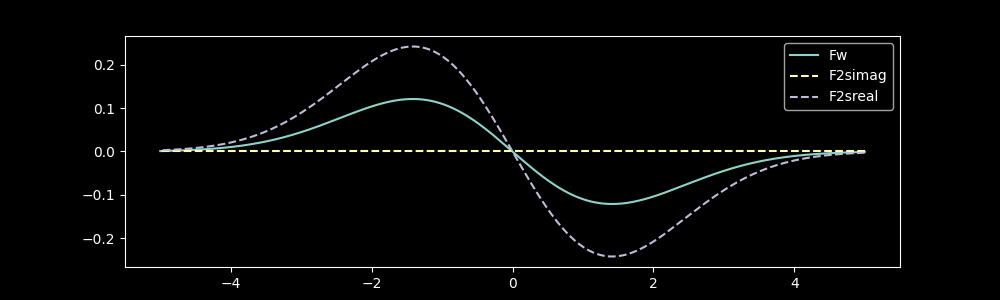

In [81]:
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xs, Fws.imag, label='Fw')
ax.plot(xs, F2ws.imag, '--', label='F2simag')
ax.plot(xs, F2ws.real, '--', label='F2sreal')

plt.legend();


So this does mess it up in the same kind of ways I'm seeing in my code.  This is an issue.  What if we use these values to complete the transform?

In [74]:
def f3(x, F=F2, Lw=-5, Rw=5, N=13, c=1):  # Note we should also just do it over positive w (Z), but that doesn't give consistent factor of difference
    ws = np.linspace(Lw, Rw, N)
    dw = ws[1] - ws[0]
    return sum([F(w, c=c)*(c*np.exp(-1j*w*x)+c.conjugate()*np.exp(1j*w*x))*dw for w in ws])
    
f3 = np.vectorize(f3)

In [75]:
f3s = f3(xs, c=1j)

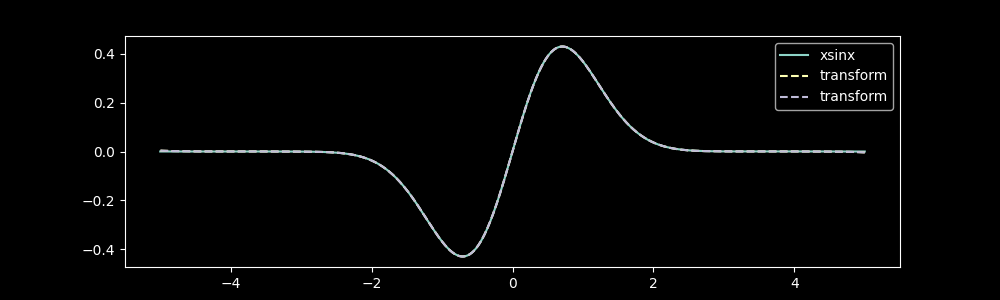

In [78]:
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xs, f(xs), label='xsinx');
ax.plot(xs, f2s.real, '--', label='transform');
ax.plot(xs, 1/4*f3s.real, '--', label='transform');
plt.legend();

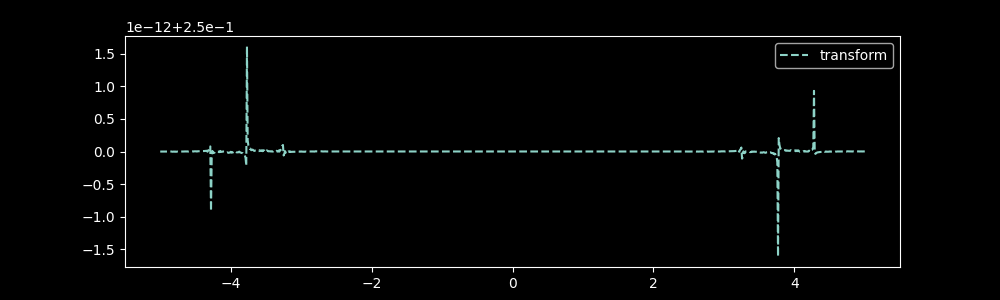

In [22]:
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xs, f2s.real[np.where(f3s.real!=0)]/f3s.real[np.where(f3s.real!=0)], '--', label='transform');
plt.legend();

Looks like they actually are the same except for a factor of 1/4...  That's cool... I guess?  Need to try other examples.  But also, kind of frustrating, because that maybe means what I'm already doing can work...  Also, something is a bit off too because I need to account for guided modes.  How can this possibly do that?

I will assume we have a material for which the scaled K is 1.  Then for each Z (w variable) we have beta = sqrt(k^2-Z^2) = sqrt(1-Z^2) and include that. Now that shows up as part of the coefficients alpha(Z), and we will be integrating over all positive Z, so we will get complex beta after Z>1.  That's definitely different than Fourier Transform.

In [18]:

def F3(w, f=f, Lx=-3, Rx=3, N=17, c=1+0j):
    xs = np.linspace(Lx, Rx, N)
    dx = xs[1] - xs[0]
    beta = np.sqrt(1-w**2, dtype=complex)
    return beta/2*sum([f(x)*(c.conjugate()*np.exp(1j*w*x)+c*np.exp(-1j*w*x))*dx for x in xs])

F3 = np.vectorize(F3)


In [19]:
def f4(x, F=F3, Lw=0, Rw=5, N=13, c=1):
    ws = np.linspace(Lw, Rw, N)
    dw = ws[1] - ws[0]
    return sum([F(w, c=c)*(c*np.exp(-1j*w*x)+c.conjugate()*np.exp(1j*w*x))*dw for w in ws])
    
f4 = np.vectorize(f4)

In [20]:
f4s = f4(xs, c=1j)

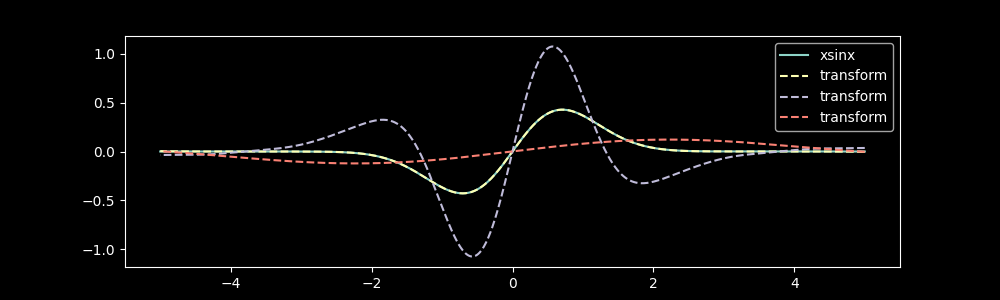

In [21]:
plt.close('all')
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(xs, f(xs), label='xsinx');
ax.plot(xs, f2s.real, '--', label='transform');
ax.plot(xs, 1/4*f4s.imag, '--', label='transform');
ax.plot(xs, 1/4*f4s.real, '--', label='transform');
plt.legend();

Okay that totally doesn't work.  And, I need to recall this doesn't have guided modes, so we don't need to worry about that part.  Including the beta in there doesn't work.  We could add it to the normalization factor to get it to cancel (except maybe issue at zero).  Then at least I did see that this could work. 

I guess the issue with beta appearing is that it should come out of Max Reciprocity, and it really does help get rid of that part of the evanescent field that doesn't otherwise decay.  I know we are integrating so it maybe wouldn't be so bad... but still.  And it might be bad, maybe I can come up with an example.

